# Initialize Settings

In [ ]:
from numpy import NaN
import numpy as np
from random import randint
import pandas as pd  
import csv 
import seaborn as sns
### Apply the default default seaborn theme, scaling, and color palette
sns.set()
import matplotlib.pyplot as plt
import math 
from operator import itemgetter
import os
 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn import tree
from sklearn.tree import _tree

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, accuracy_score 
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
#from tensorflow.keras.layers import Dense, Activation, Flatten

!pip install lazypredict

from lazypredict.Supervised import   LazyClassifier
 
import joblib 
import sys
sys.modules['sklearn.externals.joblib'] = joblib
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
# Set option to format printing of Float columns
pd.options.display.float_format = '{:.2f}'.format

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [ ]:
# Mount Google Drive

from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/gdrive') 
%cd /gdrive/My\ Drive/MSDS\ 498\ Capstone/4.\ Analytics/4a.\ Data 

Mounted at /gdrive
/gdrive/My Drive/MSDS 498 Capstone/4. Analytics/4a. Data


In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# Import Data Files

In [ ]:
'''

In modeling....

These variables will be excluded as Independent variables:

PID -- this is the unique ID
Target -- this is the Y variable


These variables will be one-hot encoded:
 
NUM_FLOORS_GRPD
R_BLDG_STYL_GRPD
R_ROOF_TYP_GRPD
R_EXT_FIN_GRPD
R_BDRMS_GRPD
R_FULL_BTH_GRPD
R_HALF_BTH_GRPD
R_BTH_STYLE
R_BTH_STYLE2
R_KITCH_STYLE
R_HEAT_TYP_GRPD
R_AC
R_FPLACE_GRPD
R_EXT_CND_GRPD
R_OVRALL_CND_GRPD
REMODELED_EVER_FLAG

All Other Variables will be treated as continuous.


'''

'\n\nIn modeling....\n\nThese variables will be excluded as Independent variables:\n\nPID -- this is the unique ID\nTarget -- this is the Y variable\n\n\nThese variables will be one-hot encoded:\n \nNUM_FLOORS_GRPD\nR_BLDG_STYL_GRPD\nR_ROOF_TYP_GRPD\nR_EXT_FIN_GRPD\nR_BDRMS_GRPD\nR_FULL_BTH_GRPD\nR_HALF_BTH_GRPD\nR_BTH_STYLE\nR_BTH_STYLE2\nR_KITCH_STYLE\nR_HEAT_TYP_GRPD\nR_AC\nR_FPLACE_GRPD\nR_EXT_CND_GRPD\nR_OVRALL_CND_GRPD\nREMODELED_EVER_FLAG\n\nAll Other Variables will be treated as continuous.\n\n\n'

In [ ]:
# Import Modeling Set
df1 = pd.read_csv('pa_2019_classification_modeling_input.csv', low_memory=False)
df1.shape
df1.info(verbose=True, show_counts=True )
df1.head()

(19991, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 111 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    R_BTH_STYLE                                   19991 non-null  object 
 3    R_BTH_STYLE2                                  19991 non-null  object 
 4    R_KITCH_STYLE                                 19991 non-null  object 
 5    R_AC                                          19991 non-null  object 
 6    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 7    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 9    inc_pct_fam_married_couple_inc_75000_99999    19

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL_LOG
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,NaN
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,1.10
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,2.94
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,NaN
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,NaN


# Plug Missing AGE_REMODEL values with AGE_BUILT

(19991, 140)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PID          19991 non-null  int64  
 1   AGE_BUILT    19991 non-null  float64
 2   AGE_REMODEL  6859 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 468.7 KB


,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,NaN
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,NaN
4,1000093000,119.00,NaN
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,NaN



# Missing AGE_BUILT before plug: 13132 



,PID,AGE_BUILT,AGE_REMODEL
0,1000019000,119.00,119.00
1,1000024000,119.00,3.00
2,1000027000,144.00,19.00
3,1000029000,119.00,119.00
4,1000093000,119.00,119.00
5,1000094000,119.00,57.00
6,1000095000,119.00,34.00
7,1000096000,119.00,16.00
8,1000099000,123.00,19.00
9,1000111000,119.00,119.00



# Missing AGE_BUILT after plug: 0


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Original: AGE_REMODEL')

Text(0.5, 1.0, 'Log Transformed: AGE_REMODEL')

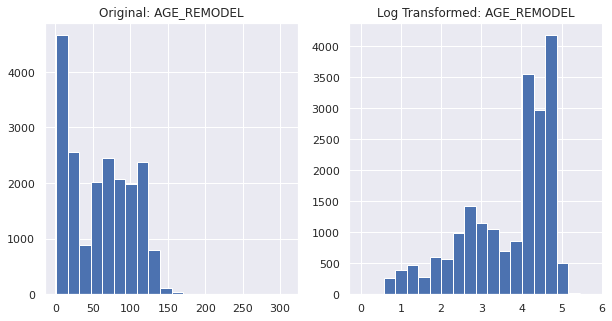

In [ ]:
# Import the EDA Set
agedf = pd.read_csv('pa_2019_eda_output.csv', low_memory=False)
agedf.shape
agedf = agedf[["PID","AGE_BUILT","AGE_REMODEL"]]
agedf.info(verbose=True, show_counts=True )
agedf.head(10)
print('\n# Missing AGE_BUILT before plug:', agedf['AGE_REMODEL'].isna().sum(),'\n')

# Plug Missing "AGE_REMODEL" with "AGE_BUILT"
agedf["AGE_REMODEL"] = np.where(agedf['AGE_REMODEL'].isna(), agedf['AGE_BUILT'], agedf['AGE_REMODEL'])
agedf.head(10)
print('\n# Missing AGE_BUILT after plug:', agedf['AGE_REMODEL'].isna().sum() )

# Show Plots of Original Data Compared to Log Transformed Version
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original: AGE_REMODEL')
agedf['AGE_REMODEL'].hist(bins=20)
plt.subplot(1, 2, 2)
plt.title('Log Transformed: AGE_REMODEL') 
np.log(agedf['AGE_REMODEL']).hist(bins=20)

# There is no value of tranforming AGE_REMODEL to LOG


### Add AGE_REMODEL to DF and Drop AGE_REMODEL_LOG

In [ ]:
df1 = pd.merge(df1, agedf[['PID','AGE_REMODEL']], left_on='PID', right_on="PID", how='left') 
df1 = df1.drop('AGE_REMODEL_LOG', axis=1)
df1.shape 
df1.head()

(19991, 111)

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_FPLACE_GRPD,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,0.00,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,1.00,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,1.00,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,0.00,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,0.00,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00


In [ ]:
colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df1.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df1.iloc[:,i].dtypes        # column type
  n_null = df1.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df1.iloc[:,i].unique()) # number unique
  n_rows = len(df1.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,R_BTH_STYLE,object,19991,19991,4,0
3,R_BTH_STYLE2,object,19991,19991,5,0
4,R_KITCH_STYLE,object,19991,19991,4,0
5,R_AC,object,19991,19991,3,0
6,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
7,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
8,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
9,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0


# Modify the Target Variable by Adding in 2018 Remodels

In [ ]:
# Read in Property Assessment Files from 2021 and 2022
url2022= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/4b99718b-d064-471b-9b24-517ae5effecc/download/fy2022pa-4.csv'  
url2021= 'https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/c4b7331e-e213-45a5-adda-052e4dd31d41/download/data2021-full.csv'

In [ ]:
framelist=[[url2022,'2022'], [url2021,'2021']]
dflist=[]
for frame in framelist:
  df= pd.read_csv(frame[0], low_memory=False)
  df["filename"] = frame[1]
  df["PID"] = df["PID"].astype(str)

  dflist.append(df)


# isolate 2022 file
pa2022_df=dflist[0]
print(pa2022_df.shape)

# isolate 2021 file
pa2021_df=dflist[1]
print(pa2021_df.shape)


(178598, 65)
(177091, 64)


In [ ]:
# Isolate the Remodel Year from the 2021 and 2022 Files
pa2022_df = pa2022_df[['PID','YR_REMODEL']]
pa2022_df.columns = ["PID","YR_REMODEL_2022PA"]
pa2022_df['PID'] = pa2022_df['PID'].astype(int)
print(pa2022_df.shape)
print(pa2022_df.head())

pa2021_df = pa2021_df[['PID','YR_REMODEL']]
pa2021_df.columns = ["PID","YR_REMODEL_2021PA"]
pa2021_df['PID'] = pa2021_df['PID'].astype(int)
print(pa2021_df.shape)
print(pa2021_df.head())

(178598, 2)
         PID  YR_REMODEL_2022PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00
(177091, 2)
         PID  YR_REMODEL_2021PA
0  100001000                NaN
1  100002000            2000.00
2  100003000            1985.00
3  100004000            1991.00
4  100005000            1978.00


In [ ]:
# Remove Duplicates
pa2022_df = pa2022_df.drop_duplicates(subset=['PID'])
pa2021_df = pa2021_df.drop_duplicates(subset=['PID'])

# Add the 2021 and 2022 Remodel Years to the List of PIDs
pids = pd.DataFrame(df1['PID'])

pids = pd.merge(pids, pa2021_df, left_on='PID', right_on="PID", how='left') 
pids = pd.merge(pids, pa2022_df, left_on='PID', right_on="PID", how='left') 
pids.shape
pids.info()
pids.head()

(19991, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PID                19991 non-null  int64  
 1   YR_REMODEL_2021PA  7275 non-null   float64
 2   YR_REMODEL_2022PA  7494 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 624.7 KB


,PID,YR_REMODEL_2021PA,YR_REMODEL_2022PA
0,1000019000,NaN,NaN
1,1000024000,2016.00,2016.00
2,1000027000,2000.00,2000.00
3,1000029000,NaN,NaN
4,1000093000,NaN,NaN


In [ ]:
pids['Target'] = 0


# pids.loc[pids['YR_REMODEL_2021PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2021PA'] == 2020, 'Target'] = 1
# pids.loc[pids['YR_REMODEL_2022PA'] == 2018, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2019, 'Target'] = 1
pids.loc[pids['YR_REMODEL_2022PA'] == 2020, 'Target'] = 1

pids['Target'].value_counts()

0    19442
1      549
Name: Target, dtype: int64

In [ ]:
pids[pids['Target']==0].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()
print('\n\n================================================================')
pids[pids['Target']==1].groupby(['YR_REMODEL_2021PA','YR_REMODEL_2022PA'])['Target'].value_counts()

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1904.00            1904.00            0           1
1919.00            1919.00            0           1
1930.00            1930.00            0           1
1935.00            1935.00            0           4
1940.00            1940.00            0           4
1945.00            1945.00            0           6
1947.00            1947.00            0           1
1949.00            1949.00            0           1
1950.00            1950.00            0          52
1951.00            1951.00            0           1
1952.00            1952.00            0           3
1953.00            1953.00            0           3
1955.00            1955.00            0           9
1956.00            1956.00            0           3
1957.00            1957.00            0           3
                   2009.00            0           1
1958.00            1958.00            0           5
1959.00            1959.00            0           3
1960.00            

YR_REMODEL_2021PA  YR_REMODEL_2022PA  Target
1954.00            2020.00            1           1
1970.00            2020.00            1           1
1975.00            2019.00            1           1
                   2020.00            1           1
1984.00            2020.00            1           1
1990.00            2020.00            1           1
1992.00            2019.00            1           1
                   2020.00            1           2
1993.00            2020.00            1           2
1994.00            2020.00            1           1
1995.00            2020.00            1           1
1996.00            2019.00            1           1
                   2020.00            1           2
1997.00            2019.00            1           1
                   2020.00            1           2
1998.00            2020.00            1           1
1999.00            2020.00            1           1
2000.00            2020.00            1           4
2001.00            

In [ ]:
df2 = df1.copy()
df2 = df2.drop('Target', axis=1)
df2 = pd.merge(df2, pids[["PID","Target"]], left_on='PID', right_on="PID", how='left') 
df1.shape
print('\n\n')
print('Targets without 2018:')
df1['Target'].value_counts() 
print('\n\n')
df2.shape
print('\n\n')
print('Targets with 2018:')
df2['Target'].value_counts()
print('\n\n')
df2.head()

(19991, 111)




Targets without 2018:


0    19442
1      549
Name: Target, dtype: int64

(19991, 111)




Targets with 2018:


0    19442
1      549
Name: Target, dtype: int64

,PID,R_TOTAL_RMS,R_BTH_STYLE,R_BTH_STYLE2,R_KITCH_STYLE,R_AC,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,...,R_EXT_CND_GRPD,R_OVRALL_CND_GRPD,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL,Target
0,1000019000,8.00,M,Null,S,N,91,15.40,0.00,23.10,...,A,A,12.43,13.17,13.56,7.27,7.90,7.61,119.00,0
1,1000024000,6.00,M,M,M,N,91,15.40,0.00,23.10,...,A,A,12.43,13.32,13.67,7.27,7.91,7.61,3.00,0
2,1000027000,8.00,M,S,M,C,91,15.40,0.00,23.10,...,G,G,12.43,13.57,13.85,7.27,8.06,7.86,19.00,0
3,1000029000,8.00,M,M,M,C,91,15.40,0.00,23.10,...,G,A,12.43,13.22,13.59,7.27,7.90,7.61,119.00,0
4,1000093000,8.00,S,S,M,N,91,15.40,0.00,23.10,...,G,G,12.54,13.46,13.80,7.38,7.93,7.69,119.00,0


# One-Hot Encoding of Categorical Variables

In [ ]:
catlist =[
'NUM_FLOORS_GRPD',
'R_BLDG_STYL_GRPD',
'R_ROOF_TYP_GRPD',
'R_EXT_FIN_GRPD',
'R_BDRMS_GRPD',
'R_FULL_BTH_GRPD',
'R_HALF_BTH_GRPD',
'R_BTH_STYLE',
'R_BTH_STYLE2',
'R_KITCH_STYLE',
'R_HEAT_TYP_GRPD',
'R_AC',
'R_FPLACE_GRPD',
'R_EXT_CND_GRPD',
'R_OVRALL_CND_GRPD',
'REMODELED_EVER_FLAG'
]

for i in catlist :
    thePrefix = "z_" + i
    y  = pd.get_dummies(df2[i], prefix=thePrefix, drop_first=True)   
    df2 = pd.concat([df2, y], axis=1)
    df2 = df2.drop([i], axis=1)

df2.shape
df2.head()
df2.info(verbose=True, show_counts=True )

(19991, 146)

,PID,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,...,z_R_AC_D,z_R_AC_N,z_R_FPLACE_GRPD_1.0,z_R_FPLACE_GRPD_2.0,z_R_FPLACE_GRPD_3.0,z_R_EXT_CND_GRPD_F_P_E,z_R_EXT_CND_GRPD_G,z_R_OVRALL_CND_GRPD_F_P_E,z_R_OVRALL_CND_GRPD_G,z_REMODELED_EVER_FLAG_1
0,1000019000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,0,0,0,0
1,1000024000,6.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,1,0,0,0,0,0,0,1
2,1000027000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,1,0,0,0,1,0,1,1
3,1000029000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,0,0,0,0,0,1,0,0,0
4,1000093000,8.00,91,15.40,0.00,23.10,7.70,35.20,8.80,128036.00,...,0,1,0,0,0,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 19990
Data columns (total 146 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    PID                                           19991 non-null  int64  
 1    R_TOTAL_RMS                                   19991 non-null  float64
 2    inc_cnt_fam_married_couple_total              19991 non-null  int64  
 3    inc_pct_fam_married_couple_inc_35000_49999    19991 non-null  float64
 4    inc_pct_fam_married_couple_inc_50000_74999    19991 non-null  float64
 5    inc_pct_fam_married_couple_inc_75000_99999    19991 non-null  float64
 6    inc_pct_fam_married_couple_inc_100000_149999  19991 non-null  float64
 7    inc_pct_fam_married_couple_inc_150000_199999  19991 non-null  float64
 8    inc_pct_fam_married_couple_inc_gt_200000      19991 non-null  float64
 9    inc_othr_fam_married_couple_inc_median        19

# Correlation Heat Map

In [ ]:
# Create a correlation matrix on numeric variables
dfcont = df2.iloc[:, 1:95] #drop PID and dummy-coded variables
dfcont = dfcont.drop('Target', axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_pct_fam_married_couple_inc_gt_200000,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Ratio_Age_dependency_ratio,as_Ratio_Old-age_dependency_ratio,as_Ratio_Child_dependency_ratio,as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Age_5_to_14_years,as_Pct_Age_15_to_17_years,as_Pct_Age_Under_18_years,as_Pct_Age_18_to_24_years,as_Pct_Age_15_to_44_years,as_Pct_Age_16_years_and_over,as_Pct_Age_18_years_and_over,as_Pct_Age_21_years_and_over,as_Pct_Age_60_years_and_over,as_Pct_Age_62_years_and_over,as_Pct_Age_65_years_and_over,as_Pct_Age_75_years_and_over,as_Cnt_Male_Total_Population,as_Othr_Male_Age_Median_age_(years),as_Cnt_Female_Total_Population,as_Othr_Female_Age_Median_age_(years),as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_some_high_school,edu_Pct_Age_25_plus_high_school,edu_Pct_Age_25_plus_some_college,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors,edu_Pct_Age_25_plus_grad_professional,edu_Pct_Age_25_plus_high_school_plus,edu_Pct_Age_25_plus_bachelors_plus,edu_Pct_Age_25to34_high_school_plus,edu_Pct_Age_25to34_bachelors_plus,edu_Pct_Age_35to44_high_school_plus,edu_Pct_Age_35to44_bachelors_plus,edu_Pct_Age_45to64_high_school_plus,edu_Pct_Age_45to64_bachelors_plus,edu_Pct_Age_65_plus_high_school_plus,edu_Pct_Age_65_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_LAND_LOG,AV_BLDG_LOG,AV_TOTAL_LOG,LAND_SF_LOG,GROSS_AREA_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.06,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.05,-0.02,-0.08,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,-0.10,0.03,-0.08,0.06,0.11,0.10,0.08,0.06,-0.04,-0.02,-0.01,-0.05,-0.08,-0.03,-0.06,-0.09,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.07,-0.06,-0.13,-0.15,0.07,0.12,0.06,0.11,0.09,0.12,0.03,0.05,-0.01,0.06,0.08,0.13,0.15,-0.23,0.31,-0.01,0.34,0.45,0.45,0.20,0.69,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.31,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,0.06,0.12,-0.08,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.09,-0.10,-0.10,-0.40,-0.30,0.11,0.10,0.20,0.24,0.21,0.20,0.18,0.52,0.45,0.53,0.17,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.37,-0.25,-0.30,-0.02,0.38,0.27,0.44,0.35,0.11,0.22,0.18,0.42,0.43,0.42,0.51,0.35,0.06,0.51,-0.04,-0.03,0.14,0.11,0.12,0.19,-0.00,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.38,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,-0.18,-0.23,0.03,0.20,-0.03,0.18,-0.19,0.10,0.19,

In [ ]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='YlOrRd', linewidths=.25)   #cmap='bwr'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
hicorr = [ 'inc_pct_fam_married_couple_inc_gt_200000'
, 'as_Ratio_Old-age_dependency_ratio'
, 'as_Pct_Age_18_years_and_over'
, 'as_Pct_Age_21_years_and_over'
, 'as_Pct_Age_62_years_and_over'
, 'as_Pct_Age_65_years_and_over'
, 'as_Pct_Age_75_years_and_over'
, 'edu_Pct_Age_25_plus_bachelors'
, 'edu_Pct_Age_25_plus_grad_professional'
, 'edu_Pct_Age_25_plus_high_school_plus'
, 'edu_Pct_Age_25to34_high_school_plus'
, 'edu_Pct_Age_25to34_bachelors_plus'
, 'edu_Pct_Age_35to44_high_school_plus'
, 'edu_Pct_Age_35to44_bachelors_plus'
, 'edu_Pct_Age_45to64_high_school_plus'
, 'edu_Pct_Age_45to64_bachelors_plus'
, 'edu_Pct_Age_65_plus_high_school_plus'
, 'edu_Pct_Age_65_plus_bachelors_plus'
, 'AV_LAND_LOG'
, 'AV_TOTAL_LOG'
, 'GROSS_AREA_LOG'
, 'as_Ratio_Age_dependency_ratio'
, 'as_Ratio_Child_dependency_ratio'
, 'as_Pct_Age_5_to_14_years'
, 'as_Pct_Age_15_to_17_years'
, 'as_Pct_Age_Under_18_years'
, 'as_Pct_Age_18_to_24_years'
, 'as_Pct_Age_15_to_44_years'
, 'as_Pct_Age_16_years_and_over'
, 'as_Pct_Age_60_years_and_over'
, 'as_Cnt_Male_Total_Population'
, 'as_Othr_Male_Age_Median_age_(years)'
, 'as_Cnt_Female_Total_Population'
, 'as_Othr_Female_Age_Median_age_(years)'
, 'edu_Pct_Age_25_plus_some_high_school'
, 'edu_Pct_Age_25_plus_high_school'
, 'edu_Pct_Age_25_plus_some_college'

]

# Create a correlation matrix on numeric variables 
dfcont = dfcont.drop(hicorr, axis=1)
correlationDF = dfcont.corr()

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
correlationDF

,R_TOTAL_RMS,inc_cnt_fam_married_couple_total,inc_pct_fam_married_couple_inc_35000_49999,inc_pct_fam_married_couple_inc_50000_74999,inc_pct_fam_married_couple_inc_75000_99999,inc_pct_fam_married_couple_inc_100000_149999,inc_pct_fam_married_couple_inc_150000_199999,inc_othr_fam_married_couple_inc_median,inc_cnt_hh_non_fam_total,inc_pct_hh_non_fam_inc_lt_10000,inc_pct_hh_non_fam_inc_10000_14999,inc_pct_hh_non_fam_inc_15000_24999,inc_pct_hh_non_fam_inc_25000_34999,inc_pct_hh_non_fam_inc_35000_49999,inc_pct_hh_non_fam_inc_50000_74999,inc_pct_hh_non_fam_inc_75000_99999,inc_pct_hh_non_fam_inc_100000_149999,inc_pct_hh_non_fam_inc_150000_199999,inc_pct_hh_non_fam_inc_gt_200000,as_Cnt_Total_Population,as_Othr_Median_age_(years),as_Ratio_Sex_ratio_(males_per_100_females),as_Pct_Age_Under_5_years,as_Pct_Age_5_to_9_years,as_Pct_Age_10_to_14_years,as_Pct_Age_15_to_19_years,as_Pct_Age_20_to_24_years,as_Pct_Age_25_to_29_years,as_Pct_Age_30_to_34_years,as_Pct_Age_35_to_39_years,as_Pct_Age_40_to_44_years,as_Pct_Age_45_to_49_years,as_Pct_Age_50_to_54_years,as_Pct_Age_55_to_59_years,as_Pct_Age_60_to_64_years,as_Pct_Age_65_to_69_years,as_Pct_Age_70_to_74_years,as_Pct_Age_75_to_79_years,as_Pct_Age_80_to_84_years,as_Pct_Age_85_years_and_over,as_Pct_Female_Age_21_years_and_over,edu_Pct_Age_18to24_lt_high_school,edu_Pct_Age_18to24_high_school,edu_Pct_Age_18to24_some_college,edu_Pct_Age_18to24_bachelors,edu_Pct_Age_25_plus_lt_9th,edu_Pct_Age_25_plus_associates,edu_Pct_Age_25_plus_bachelors_plus,sale_price,DISTANCE,AGE_BUILT,AGE_SALE,AV_BLDG_LOG,LAND_SF_LOG,LIVING_AREA_LOG,AGE_REMODEL
R_TOTAL_RMS,1.00,-0.05,-0.01,-0.10,-0.02,-0.05,-0.01,0.07,0.04,-0.00,-0.06,-0.07,-0.00,-0.09,-0.00,-0.08,0.10,0.06,0.17,-0.07,-0.06,-0.03,-0.03,-0.06,-0.10,0.04,0.06,0.02,0.12,0.02,0.07,-0.07,-0.08,0.03,-0.09,0.05,0.03,-0.05,-0.11,-0.01,0.03,-0.01,-0.04,-0.02,0.07,-0.03,-0.15,0.11,0.15,-0.23,0.31,-0.01,0.45,0.20,0.72,0.02
inc_cnt_fam_married_couple_total,-0.05,1.00,-0.23,-0.25,-0.31,0.11,0.22,0.27,0.37,-0.29,0.03,0.08,-0.07,0.34,-0.07,-0.01,0.14,-0.10,-0.15,0.54,0.30,-0.04,-0.00,-0.01,-0.11,-0.20,-0.36,-0.14,-0.06,-0.04,0.02,-0.01,0.36,0.14,0.26,0.05,0.23,0.50,0.02,-0.04,-0.04,0.00,-0.20,0.08,0.12,-0.43,-0.02,0.35,0.06,0.51,-0.04,-0.03,0.11,0.19,-0.04,-0.05
inc_pct_fam_married_couple_inc_35000_49999,-0.01,-0.23,1.00,0.07,0.22,-0.14,-0.34,-0.42,0.12,0.08,0.44,0.15,-0.15,-0.06,-0.23,0.00,-0.15,0.03,-0.16,0.04,-0.30,0.08,0.20,-0.03,0.18,-0.19,0.10,0.19,0.30,0.11,-0.00,-0.18,0.00,-0.19,-0.16,-0.34,-0.13,-0.14,-0.11,-0.14,0.00,0.12,-0.07,-0.16,0.10,0.33,-0.03,-0.29,-0.08,-0.24,0.01,0.01,-0.18,-0.19,-0.01,0.04
inc_pct_fam_married_couple_inc_50000_74999,-0.10,-0.25,0.07,1.00,0.15,-0.27,-0.06,-0.60,-0.05,0.28,0.01,0.52,-0.08,-0.14,0.08,0.13,-0.32,-0.25,-0.29,0.18,-0.26,-0.09,0.05,0.22,0.24,0.02,0.21,0.12,-0.18,0.20,-0.24,0.07,-0.27,-0.01,0.07,-0.03,-0.21,-0.28,-0.10,-0.16,-0.25,0.10,0.13,-0.08,-0.14,0.40,0.38,-0.43,-0.11,0.11,-0.12,0.02,-0.33,-0.07,-0.15,0.02
inc_pct_fam_married_couple_inc_75000_99999,-0.02,-0.31,0.22,0.15,1.00,0.04,-0.26,-0.55,-0.18,0.23,0.11,0.14,0.16,-0.04,-0.23,0.06,-0.11,-0.25,-0.16,0.07,-0.43,0.04,0.25,0.11,0.05,0.12,0.12,0.19,0.12,0.23,0.07,0.10,-0.10,-0.19,-0.39,-0.16,-0.39,-0.20,-0.13,-0.25,-0.12,0.33,-0.05,-0.05,-0.18,0.34,0.18,-0.50,-0.14,-0.07,-0.01,0.04,-0.34,-0.11,-0.07,0.07
inc_pct_fam_married_couple_inc_100000_149999,-0.05,0.11,-0.14,-0.27,0.04,1.00,-0.11,-0.15,0.07,0.06,-0.05,-0.12,0.02,0.10,-0.08,0.21,0.08,-0.14,-0.26,0.16,-0.20,0.29,0.06,-0.15,-0.05,0.06,-0.06,0.27,-0.07,0.18,0.06,0.21,0.10,0.04,-0.09,-0.33,-0.33,-0.05,0.04,-0.18,0.16,0.13,0.03,-0.13,-0.01,-0.10,0.02,-0.14,-0.07,0.13,0.01,0.02,-0.11,-0.05,-0.08,0.03
inc_pct_fam_married_couple_inc_150000_199999,-0.01,0.22,-0.34,-0.06,-0.26,-0.11,1.00,0.32,-0.05,-0.13,-0.23,-0.22,-0.09,0.07,0.00,0.04,0.31,-0.00,0.15,-0.00,0.10,-0.01,-0.28,0.03,-0.17,-0.07,0.09,-0.16,0.11,0.05,0.01,0.27,-0.10,0.23,0.05,0.11,-0.07,0.04,-0.04,0.01,0.10,-0.26,-0.05,0.29,0.01,-0.23,-0.06,0.34,0.06,0.20,0.05,-0.03,0.14

In [ ]:
fig, ax = plt.subplots(figsize=(150, 120))
sns.heatmap(correlationDF, vmax=1, square=True, annot=True, cmap='YlOrRd', linewidths=.25)   #cmap='bwr'
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_yticklabels(
ax.get_yticklabels(),
rotation=0,
horizontalalignment='right'
);
ax.set_xticklabels(
ax.get_xticklabels(),
rotation=0,
horizontalalignment='center'
);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Output the Modeling Frame Contents After Dropping Columns

colnames = []
coltypes = []
colnulls = []
coluniqs = []
colrows  = []
colpop   = []

dfcols = list(df2.columns)

for i in range(len(dfcols)):

  col    = dfcols[i]                   # column name
  coltyp = df2.iloc[:,i].dtypes        # column type
  n_null = df2.iloc[:,i].isna().sum()  # number of nulls
  n_uniq = len(df2.iloc[:,i].unique()) # number unique
  n_rows = len(df2.iloc[:,i])          # number rows
  n_pop  = n_rows - n_null             # number populated

  colnames.append(col)
  coltypes.append(coltyp)
  colnulls.append(n_null)
  coluniqs.append(n_uniq)
  colrows.append(n_rows)
  colpop.append(n_pop)
  #print(col + str(n_null) + str(n_uniq) + str(n_rows) + str(n_pop) + str(coltyp))

eda_df = pd.DataFrame(colnames)
eda_df.columns = ['Name']
eda_df["Type"] = coltypes
eda_df["Observations"] = colrows
eda_df["Populated"] = colpop
eda_df["Unique"] = coluniqs
eda_df["Missing"] = colnulls

pd.set_option('display.max_rows', 200)
eda_df

,Name,Type,Observations,Populated,Unique,Missing
0,PID,int64,19991,19991,19991,0
1,R_TOTAL_RMS,float64,19991,19991,18,0
2,inc_cnt_fam_married_couple_total,int64,19991,19991,79,0
3,inc_pct_fam_married_couple_inc_35000_49999,float64,19991,19991,55,0
4,inc_pct_fam_married_couple_inc_50000_74999,float64,19991,19991,67,0
5,inc_pct_fam_married_couple_inc_75000_99999,float64,19991,19991,68,0
6,inc_pct_fam_married_couple_inc_100000_149999,float64,19991,19991,75,0
7,inc_pct_fam_married_couple_inc_150000_199999,float64,19991,19991,69,0
8,inc_pct_fam_married_couple_inc_gt_200000,float64,19991,19991,77,0
9,inc_othr_fam_married_couple_inc_median,float64,19991,19991,78,0


# OVER AND UNDER SAMPLING

### Split into Train and Test -- PRE-Sampling

In [ ]:
df3 = df2.copy()
df3 = df3.drop(hicorr, axis=1)  # Drop highly correlated features
 
# Split into test and train data frames
np.random.seed(789)
train, test = train_test_split(df3, train_size=0.8, test_size=0.2, random_state=1)

print("PreSplit =", df3.shape)
print("train =", train.shape)
print("test =", test.shape)


PreSplit = (19991, 109)
train = (15992, 109)
test = (3999, 109)


In [ ]:
# Split the Targets from the NonTargets in the Train set
targets = pd.DataFrame(train[train['Target']==1])
nontargets = pd.DataFrame(train[train['Target']==0])

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)


In [ ]:
# Create a Dataframe with 2000 Randomly Selected Targets -- these will be added to modeling frame as OVER SAMPLING

 
cnt=0
for k in range(0,2500):
  if cnt == 0:
    np.random.seed(789)
    smplrecs = targets.sample() 
    cnt = 1
  else:
    np.random.seed(789)
    smplrec = targets.sample() 
    smplrecs = smplrecs.append(smplrec)
     
smplrecs.shape

(2500, 109)

In [ ]:
# Randomly Select 5000 Rows from the NON-Target population to remove


np.random.seed(789)
undersamplist = [randint(0, nontargets.shape[0]-1) for p in range(0, 5000 )]
print('# Gross Sampled:',len(undersamplist) )

undersamplist = set(undersamplist) 
print('# Net Sampled:',len(undersamplist) )

# Get list oF PIDs
piddroplist = []
for k in undersamplist:
  smplrec = nontargets.iloc[k,0] 
  piddroplist.append(smplrec) 

print('# Uniqued PIDs:', len(piddroplist) )

# Gross Sampled: 5000
# Net Sampled: 4291
# Uniqued PIDs: 4291


In [ ]:
# Append the Oversampled set to the Original Targets
targets2 = targets.copy()
targets2 = targets2.append(smplrecs)

print("targets:",targets.shape )
print("rows to add:",smplrecs.shape )
print("targets2:",targets2.shape )


# Remove the Randomly Selected Undersampled records from the Original Non Targets
nontargets2 = nontargets[~nontargets.PID.isin(piddroplist)]

print("nontargets:",nontargets.shape )
print('PIDs to Drop:', len(piddroplist) )
print("nontargets2:",nontargets2.shape )


targets: (432, 109)
rows to add: (2500, 109)
targets2: (2932, 109)
nontargets: (15560, 109)
PIDs to Drop: 4291
nontargets2: (11269, 109)


In [ ]:
# Rebuid the Train Set
train2 = targets2.copy()
train2 = train2.append(nontargets2)

print("train =", train.shape)
print("targets:",targets.shape )
print("nontargets:",nontargets.shape )
print("targets2:",targets2.shape )
print("nontargets2:",nontargets2.shape )
print("train2 =", train2.shape)
print(train['Target'].value_counts())
print(train2['Target'].value_counts())

train = (15992, 109)
targets: (432, 109)
nontargets: (15560, 109)
targets2: (2932, 109)
nontargets2: (11269, 109)
train2 = (14201, 109)
0    15560
1      432
Name: Target, dtype: int64
0    11269
1     2932
Name: Target, dtype: int64


### Separate the Independent X variables from the Target Y Variable

In [ ]:
X_train = train.copy()
# X_train = train2.copy()
X_train_ids = X_train['PID']
Y_train = pd.DataFrame(X_train['Target'])
X_train = X_train.drop(['PID','Target'], axis=1) 

X_test = test.copy()
X_test_ids = X_test['PID']
Y_test = pd.DataFrame(X_test['Target'])
X_test = X_test.drop(['PID','Target'], axis=1) 


print('Train Targets:',Y_train.sum() )
print('Test Targets:',Y_test.sum() )



Train Targets: Target    432
dtype: int64
Test Targets: Target    117
dtype: int64


In [ ]:
# Create "weights" dictionary for use in "class_weights" in some model functions

# counts = np.bincount(Y_train['Target'])  # ratio based on Train set
counts = np.bincount(df3['Target'] )       # ratio based on full dataframe
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(df3['Target'])
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]
print('weight for 0:', weight_for_0 )
print('weight for 1:', weight_for_1 )

weights = {0: weight_for_0, 1: weight_for_1}
print('weights:', weights)


Number of positive samples in training data: 549 (2.75% of total)
weight for 0: 5.143503754757741e-05
weight for 1: 0.0018214936247723133
weights: {0: 5.143503754757741e-05, 1: 0.0018214936247723133}


In [ ]:
# Use the Over- Under- Sampled version for Gradient Boosting

Z_train = train2.copy()
Z_train_ids = Z_train['PID']
ZY_train = pd.DataFrame(Z_train['Target'])
Z_train = Z_train.drop(['PID','Target'], axis=1) 

Z_test = test.copy()
Z_test_ids = Z_test['PID']
ZY_test = pd.DataFrame(Z_test['Target'])
Z_test = Z_test.drop(['PID','Target'], axis=1) 

print('Train Shape:',Z_train.shape)
print('Train Targets:',ZY_train.sum() )
print('Test Shape:',Z_test.shape)
print('Test Targets:',ZY_test.sum() )


Train Shape: (14201, 107)
Train Targets: Target    2932
dtype: int64
Test Shape: (3999, 107)
Test Targets: Target    117
dtype: int64


# Define Functions for Assessing Model Performance

In [ ]:
# CLASSIFICATION: Create functions to calculate and display classifcation accuracy and to generate ROC curve 

def getCoefLogit(MODEL, TRAIN_DATA) :
    # varNames = list(TRAIN_DATA.columns.values)
    if type(TRAIN_DATA) ==  np.ndarray:
      varNames = list(X_train.columns.values)
    else:
      varNames = list(TRAIN_DATA.columns.values)
      
    coef_dict = {}
    coef_dict["INTERCEPT"] = MODEL.intercept_[0]
    for coef, feat in zip(MODEL.coef_[0],varNames):
        coef_dict[feat] = coef
    print("\nCLASSIFICATION MODEL")
    print("------------------------------------------------")
    print("Total Variables: ", len( coef_dict))
    for i in coef_dict :
        print( i, " = ", coef_dict[i]  )


def getProbAccuracyScores(NAME, MODEL, X, Y) :
    pred = MODEL.predict(X)
    probs = MODEL.predict_proba(X)
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

def print_Accuracy(TITLE, LIST) :
    print(TITLE)
    for theResults in LIST :
        NAME = theResults[0]
        ACC = theResults[1]
        print(NAME, " = ", ACC)


def print_ROC_Curve(TITLE, LIST) :
    fig = plt.figure(figsize=(6,4), facecolor="w")
    plt.title(TITLE)
    k = 0
    for theResults in LIST :
        k=k+1  
        if k==1:
          lcolor = '#AF0026'
        else:
          lcolor = '#FEA747'

        NAME = theResults[0]
        fpr = theResults[2]
        tpr = theResults[3]
        auc = theResults[4]
        theLabel = "AUC " + NAME + ' %0.2f' % auc          
        plt.plot(fpr, tpr, label = theLabel , color=lcolor, linewidth=3 )
    plt.legend(loc = 'lower right', facecolor='white', framealpha=0) 
    plt.plot([0, 1], [0, 1],'r--', color='grey', linewidth=2)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    ax = plt.axes()
    ax.set_facecolor("white")
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    # ax.spines['top'].set_color('black')
    # ax.spines['right'].set_color('black')
    plt.show() 

# Create function to select most important variables to use in decision tree model to reduce size (to take a large data set down to something small) 

def getTreeVars(TREE, varNames) :
    tree_ = TREE.tree_
    varName = [varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList :
        parameter_list.append(varNames[i])
    return parameter_list


# Create function to select most important variables to use in random forest and gradient boosted models to reduce size (to take a large data set down to something small)  

def getEnsembleTreeVars(ENSTREE, varNames) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average(ENSTREE.feature_importances_) :
            v = int(imp_val / np.max(ENSTREE.feature_importances_) * 100)
            theList.append((varNames[i], v))
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

# GRID SEARCH

In [ ]:
# These columns 'popped' most often in TREE, GB, and RF

topvars = [
 'AGE_BUILT'
,'sale_price'
,'AGE_SALE'
,'DISTANCE'
,'AV_BLDG_LOG'
,'LAND_SF_LOG'
,'LIVING_AREA_LOG'
,'AGE_REMODEL'
,'R_TOTAL_RMS'
# ,'as_Pct_Age_30_to_34_years'
,'edu_Pct_Age_25_plus_bachelors_plus'
# ,'inc_pct_hh_non_fam_inc_75000_99999'
# ,'edu_Pct_Age_25_plus_lt_9th'
]



U_train = X_train.copy() 
U_test  = X_test.copy() 
U_train = U_train[topvars]
U_test  = U_test[topvars]
U_train.shape 
U_test.shape  


(15992, 10)

(3999, 10)

# NEURAL NETWORK HYPERPARAMETER TUNING


In [ ]:

from sklearn.preprocessing import StandardScaler


# theScaler = MinMaxScaler() 
# theScaler.fit(X_train)


theScaler = StandardScaler()
theScaler.fit(X_train)
 
 

StandardScaler()

In [ ]:
def print_AUC_and_Accuracy(TITLE1, TITLE2, LIST) :
    print(TITLE1)
    for theResults in LIST :
        NAME = theResults[0]
        AUC = round(theResults[4],3)
        print("  ", NAME, " = ", AUC)
    #print("\n")
    print(TITLE2)
    for theResults in LIST :
        NAME = theResults[0]
        ACC = round(theResults[1],3)
        print("  ", NAME, " = ", ACC)   

def get_TF_ProbAccuracyScores( NAME, MODEL, X, Y ) :
    probs = MODEL.predict( X )
    pred_list = []
    for p in probs :
        pred_list.append( np.argmax( p ) )
    pred = np.array( pred_list )
    acc_score = metrics.accuracy_score(Y, pred)
    p1 = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve( Y, p1)
    auc = metrics.auc(fpr,tpr)
    return [NAME, acc_score, fpr, tpr, auc]

In [ ]:
WHO = "Neural Net"

# Scale the data
Z_train = theScaler.transform( X_train )
Z_test = theScaler.transform( X_test )

# Convert to DataFrame
Z_train = pd.DataFrame( Z_train )
Z_test = pd.DataFrame( Z_test )

# Get columns from X dataframes
Z_train.columns = list( X_train.columns.values )
Z_test.columns = list( X_train.columns.values )

# Limit X dataframes to Important Variables
Z_train = Z_train[ topvars ]
Z_test = Z_test[ topvars ]



In [ ]:
Z_train.shape 
Z_test.shape 


(15992, 10)

(3999, 10)

# Neural Net - No Hidden Layers

In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.9.2
Running on TPU  ['10.9.195.10:8470']


In [ ]:
F_theShapeSize = Z_train.shape[1]
F_theActivation = [tf.keras.activations.relu,tf.keras.activations.softmax,\
                  tf.keras.activations.tanh]
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = [500]

F_theUnits = [int( 2*F_theShapeSize ), int( 2*F_theShapeSize / 3 )]

print("--------------------------------------------------")
print("NO HIDDEN LAYERS  ")
print("--------------------------------------------------")
print("\n")
for a in F_theActivation:
    for b in F_theEpochs:
        for c in F_theUnits:
            
            F_LAYER_01 = tf.keras.layers.Dense( units=c, activation=a, input_dim=F_theShapeSize )
            F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
            F_LAYER_02 = tf.keras.layers.Dense( units=c, activation=a )
            F_LAYER_OUTPUT = tf.keras.layers.Dense( units=2, activation=tf.keras.activations.softmax )

            CLM = tf.keras.Sequential()
            CLM.add( F_LAYER_01 )
            #CLM.add( F_LAYER_DROP )
            #CLM.add( F_LAYER_02 )
            CLM.add( F_LAYER_OUTPUT )
            CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer) 
            CLM.fit( Z_train, Y_train['Target'], epochs=b, verbose=False , class_weight=weights)

            TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, Z_train, Y_train[ 'Target' ] )
            TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, Z_test, Y_test[ 'Target' ] )

            #print("\n")
            print("Hyperparameters:")
            print("  Activation = ", a)
            print("  Epochs = ", b)
            print("  Units = ", c)
            #print("\n")
            print_AUC_and_Accuracy( WHO + " CLASSIFICATION AUC:", WHO + " CLASSIFICATION ACCURACY:",\
                                   [ TRAIN_CLM, TEST_CLM ] )
            print("\n--------------------------------------------------\n")

--------------------------------------------------
NO HIDDEN LAYERS  
--------------------------------------------------




125/125 [==============================] - 0s 808us/step
Hyperparameters:
  Activation =  <function relu at 0x7f5abc8b05f0>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.821
   Neural Net  =  0.649
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.692
   Neural Net  =  0.68

--------------------------------------------------



125/125 [==============================] - 0s 990us/step
Hyperparameters:
  Activation =  <function relu at 0x7f5abc8b05f0>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.762
   Neural Net  =  0.711
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.749
   Neural Net  =  0.746

--------------------------------------------------



125/125 [==============================] - 0s 944us/step
Hyperparameters:
  Activation =  <function softmax at 0x7f5abcaea320>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.841
   Neural Net  =  0.643
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.673
   Neural Net  =  0.662

--------------------------------------------------



125/125 [==============================] - 0s 995us/step
Hyperparameters:
  Activation =  <function softmax at 0x7f5abcaea320>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.761
   Neural Net  =  0.68
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.696
   Neural Net  =  0.678

--------------------------------------------------



125/125 [==============================] - 0s 979us/step
Hyperparameters:
  Activation =  <function tanh at 0x7f5abc8b0950>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.843
   Neural Net  =  0.661
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.742
   Neural Net  =  0.715

--------------------------------------------------



125/125 [==============================] - 0s 888us/step
Hyperparameters:
  Activation =  <function tanh at 0x7f5abc8b0950>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.783
   Neural Net  =  0.696
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.709
   Neural Net  =  0.705

--------------------------------------------------



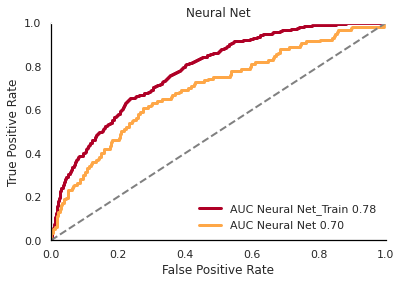

Neural Net CLASSIFICATION ACCURACY
------------------------------------------------
Neural Net_Train  =  0.7091045522761381
Neural Net  =  0.7049262315578895


Neural Net AUC SCORE
------------------------------------------------
 Train:  0.7826095817861564 
 Test:  0.696198100371207


In [ ]:

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])



### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_pred = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_pred['pred_Y'] = np.where(dftrain_y_pred.iloc[:,1]>.5,1,0 ) 
dftrain_y_pred = dftrain_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftrain_y_prob = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_prob = dftrain_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_pred)
recall = recall_score(Y_train, dftrain_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_pred))

500/500 [==============================] - 0s 866us/step

===== CONFUSION MATRIX =====

[[11047  4513]
 [  139   293]]


ACCURACY: 0.7091045522761381
F1-SCORE: 0.11187476135929744
PRECISION: 0.060965459841864335
RECALL: 0.6782407407407407
AUC 0.7826095817861564
# PREDICTED TARGETS: 4806


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_pred = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_pred['pred_Y'] = np.where(dftest_y_pred.iloc[:,1]>.5,1,0 ) 
dftest_y_pred = dftest_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftest_y_prob = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_prob = dftest_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_pred)
recall = recall_score(Y_test, dftest_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_pred))

125/125 [==============================] - 0s 873us/step

===== CONFUSION MATRIX =====

[[2747 1135]
 [  45   72]]


ACCURACY: 0.7049262315578895
F1-SCORE: 0.10876132930513593
PRECISION: 0.05965202982601491
RECALL: 0.6153846153846154
AUC 0.696198100371207
# PREDICTED TARGETS: 1207


# Neural Net - 1 Hidden Layers

In [ ]:
F_theShapeSize = Z_train.shape[1]
F_theActivation = [tf.keras.activations.relu,tf.keras.activations.softmax,\
                  tf.keras.activations.tanh]
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = [500]

F_theUnits = [int( 2*F_theShapeSize ), int( 2*F_theShapeSize / 3 )]

print("--------------------------------------------------")
print("ONE HIDDEN LAYER ")
print("--------------------------------------------------")
print("\n")
for a in F_theActivation:
    for b in F_theEpochs:
        for c in F_theUnits:
            
            F_LAYER_01 = tf.keras.layers.Dense( units=c, activation=a, input_dim=F_theShapeSize )
            F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
            F_LAYER_02 = tf.keras.layers.Dense( units=c, activation=a )
            F_LAYER_OUTPUT = tf.keras.layers.Dense( units=2, activation=tf.keras.activations.softmax )

            CLM = tf.keras.Sequential()
            CLM.add( F_LAYER_01 )
            #CLM.add( F_LAYER_DROP )
            CLM.add( F_LAYER_02 )
            CLM.add( F_LAYER_OUTPUT )
            CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
            CLM.fit( Z_train, Y_train['Target'], epochs=b, verbose=False  , class_weight=weights )

            TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, Z_train, Y_train[ 'Target' ] )
            TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, Z_test, Y_test[ 'Target' ] )
    
            #print("\n")
            print("Hyperparameters:")
            print("  Activation = ", a)
            print("  Epochs = ", b)
            print("  Units = ", c)
            #print("\n")
            print_AUC_and_Accuracy( WHO + " CLASSIFICATION AUC:", WHO + " CLASSIFICATION ACCURACY:",\
                                   [ TRAIN_CLM, TEST_CLM ] )
            print("\n--------------------------------------------------\n")

--------------------------------------------------
ONE HIDDEN LAYER 
--------------------------------------------------




125/125 [==============================] - 0s 806us/step
Hyperparameters:
  Activation =  <function relu at 0x7f5abc8b05f0>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.944
   Neural Net  =  0.622
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.857
   Neural Net  =  0.818

--------------------------------------------------



125/125 [==============================] - 0s 767us/step
Hyperparameters:
  Activation =  <function relu at 0x7f5abc8b05f0>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.796
   Neural Net  =  0.674
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.613
   Neural Net  =  0.591

--------------------------------------------------



125/125 [==============================] - 0s 863us/step
Hyperparameters:
  Activation =  <function softmax at 0x7f5abcaea320>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.855
   Neural Net  =  0.649
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.705
   Neural Net  =  0.685

--------------------------------------------------



125/125 [==============================] - 0s 888us/step
Hyperparameters:
  Activation =  <function softmax at 0x7f5abcaea320>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.773
   Neural Net  =  0.69
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.655
   Neural Net  =  0.645

--------------------------------------------------



125/125 [==============================] - 0s 807us/step
Hyperparameters:
  Activation =  <function tanh at 0x7f5abc8b0950>
  Epochs =  500
  Units =  20
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.964
   Neural Net  =  0.603
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.88
   Neural Net  =  0.837

--------------------------------------------------



125/125 [==============================] - 0s 887us/step
Hyperparameters:
  Activation =  <function tanh at 0x7f5abc8b0950>
  Epochs =  500
  Units =  6
Neural Net CLASSIFICATION AUC:
   Neural Net_Train  =  0.809
   Neural Net  =  0.626
Neural Net CLASSIFICATION ACCURACY:
   Neural Net_Train  =  0.726
   Neural Net  =  0.711

--------------------------------------------------



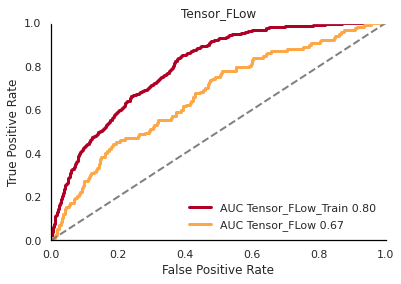

Tensor_FLow CLASSIFICATION ACCURACY
------------------------------------------------
Tensor_FLow_Train  =  0.7119184592296148
Tensor_FLow  =  0.7104276069017255


Tensor_FLow AUC SCORE
------------------------------------------------
 Train:  0.7997039536322956 
 Test:  0.6687847043333907


In [ ]:

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])



### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_pred = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_pred['pred_Y'] = np.where(dftrain_y_pred.iloc[:,1]>.5,1,0 ) 
dftrain_y_pred = dftrain_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftrain_y_prob = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_prob = dftrain_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_pred)
recall = recall_score(Y_train, dftrain_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_pred))

500/500 [==============================] - 1s 2ms/step

===== CONFUSION MATRIX =====

[[11084  4476]
 [  131   301]]


ACCURACY: 0.7119184592296148
F1-SCORE: 0.11556920714148591
PRECISION: 0.06301025748377644
RECALL: 0.6967592592592593
AUC 0.7997039536322956
# PREDICTED TARGETS: 4777


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_pred = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_pred['pred_Y'] = np.where(dftest_y_pred.iloc[:,1]>.5,1,0 ) 
dftest_y_pred = dftest_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftest_y_prob = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_prob = dftest_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_pred)
recall = recall_score(Y_test, dftest_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_pred))

125/125 [==============================] - 0s 2ms/step

===== CONFUSION MATRIX =====

[[2783 1099]
 [  59   58]]


ACCURACY: 0.7104276069017255
F1-SCORE: 0.09105180533751964
PRECISION: 0.05012964563526361
RECALL: 0.49572649572649574
AUC 0.6687847043333907
# PREDICTED TARGETS: 1157


# Neural Net - 1 Hidden Layer and 1 Drop Layer

In [ ]:
F_theShapeSize = Z_train.shape[1]
F_theActivation = [tf.keras.activations.relu,tf.keras.activations.softmax,\
                  tf.keras.activations.tanh]
F_theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()
F_theOptimizer = tf.keras.optimizers.Adam()
F_theEpochs = [500]

F_theUnits = [int( 2*F_theShapeSize ), int( 2*F_theShapeSize / 3 )]

print("--------------------------------------------------")
print("ONE HIDDEN LAYER AND DROP LAYER  ")
print("--------------------------------------------------")
print("\n")
for a in F_theActivation:
    for b in F_theEpochs:
        for c in F_theUnits:
            
            F_LAYER_01 = tf.keras.layers.Dense( units=c, activation=a, input_dim=F_theShapeSize )
            F_LAYER_DROP = tf.keras.layers.Dropout( 0.2 )
            F_LAYER_02 = tf.keras.layers.Dense( units=c, activation=a )
            F_LAYER_OUTPUT = tf.keras.layers.Dense( units=2, activation=tf.keras.activations.softmax )

            CLM = tf.keras.Sequential()
            CLM.add( F_LAYER_01 )
            CLM.add( F_LAYER_DROP )
            CLM.add( F_LAYER_02 )
            CLM.add( F_LAYER_OUTPUT )
            CLM.compile( loss=F_theLossMetric, optimizer=F_theOptimizer)
            CLM.fit( Z_train, Y_train['Target'], epochs=b, verbose=False  , class_weight=weights)


            TRAIN_CLM = get_TF_ProbAccuracyScores( WHO + "_Train", CLM, Z_train, Y_train[ 'Target' ] )
            TEST_CLM = get_TF_ProbAccuracyScores( WHO, CLM, Z_test, Y_test[ 'Target' ] )
    
            #print("\n")
            print("Hyperparameters:")
            print("  Activation = ", a)
            print("  Epochs = ", b)
            print("  Units = ", c)
            #print("\n")
            print_AUC_and_Accuracy( WHO + " CLASSIFICATION AUC:", WHO + " CLASSIFICATION ACCURACY:",\
                                   [ TRAIN_CLM, TEST_CLM ] )
            print("\n--------------------------------------------------\n")

--------------------------------------------------
ONE HIDDEN LAYER AND DROP LAYER  
--------------------------------------------------




125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function relu at 0x7fc8e5af5560>
  Epochs =  500
  Units =  20
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.908
   Tensor_FLow  =  0.65
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.764
   Tensor_FLow  =  0.738

--------------------------------------------------



125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function relu at 0x7fc8e5af5560>
  Epochs =  500
  Units =  6
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.773
   Tensor_FLow  =  0.713
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.77
   Tensor_FLow  =  0.766

--------------------------------------------------



125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function softmax at 0x7fc8e5cc0290>
  Epochs =  500
  Units =  20
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.84
   Tensor_FLow  =  0.628
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.722
   Tensor_FLow  =  0.709

--------------------------------------------------



125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function softmax at 0x7fc8e5cc0290>
  Epochs =  500
  Units =  6
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.774
   Tensor_FLow  =  0.698
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.677
   Tensor_FLow  =  0.673

--------------------------------------------------



125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function tanh at 0x7fc8e5af58c0>
  Epochs =  500
  Units =  20
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.892
   Tensor_FLow  =  0.666
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.757
   Tensor_FLow  =  0.735

--------------------------------------------------



125/125 [==============================] - 0s 2ms/step
Hyperparameters:
  Activation =  <function tanh at 0x7fc8e5af58c0>
  Epochs =  500
  Units =  6
Tensor_FLow CLASSIFICATION AUC:
   Tensor_FLow_Train  =  0.782
   Tensor_FLow  =  0.722
Tensor_FLow CLASSIFICATION ACCURACY:
   Tensor_FLow_Train  =  0.763
   Tensor_FLow  =  0.753

--------------------------------------------------



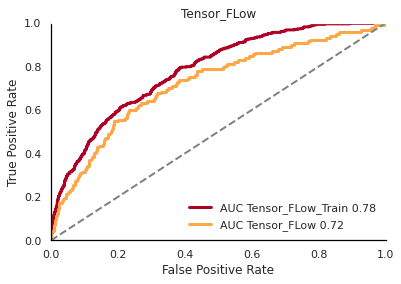

Tensor_FLow CLASSIFICATION ACCURACY
------------------------------------------------
Tensor_FLow_Train  =  0.7631315657828914
Tensor_FLow  =  0.7531882970742686


Tensor_FLow AUC SCORE
------------------------------------------------
 Train:  0.7821137413120061 
 Test:  0.7223279039353228


In [ ]:

print_ROC_Curve( WHO, [TRAIN_CLM, TEST_CLM ] ) 
print_Accuracy( WHO + " CLASSIFICATION ACCURACY\n------------------------------------------------", [TRAIN_CLM, TEST_CLM])
print("\n")    
print( WHO + " AUC SCORE\n------------------------------------------------\n", 'Train: ', TRAIN_CLM[-1], '\n Test: ', TEST_CLM[-1])



### Get Performance Statistics from TRAIN

In [ ]:
# Make predictions using the training set
# These are the binary (1,0) predictions
dftrain_y_pred = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_pred['pred_Y'] = np.where(dftrain_y_pred.iloc[:,1]>.5,1,0 ) 
dftrain_y_pred = dftrain_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftrain_y_prob = pd.DataFrame( CLM.predict(Z_train) )
dftrain_y_prob = dftrain_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_train, dftrain_y_pred)

# AUC Score
auc = TRAIN_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_train, dftrain_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_train, dftrain_y_pred)
recall = recall_score(Y_train, dftrain_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_train, dftrain_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftrain_y_pred))

500/500 [==============================] - 1s 2ms/step

===== CONFUSION MATRIX =====

[[11932  3628]
 [  160   272]]


ACCURACY: 0.7631315657828914
F1-SCORE: 0.12557710064635272
PRECISION: 0.06974358974358974
RECALL: 0.6296296296296297
AUC 0.7821137413120061
# PREDICTED TARGETS: 3900


### Get Performance Statistics from TEST

In [ ]:
# Make predictions using the testing set
# These are the binary (1,0) predictions
dftest_y_pred = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_pred['pred_Y'] = np.where(dftest_y_pred.iloc[:,1]>.5,1,0 ) 
dftest_y_pred = dftest_y_pred['pred_Y']


# These are the actual probabilities of 0 or 1
dftest_y_prob = pd.DataFrame( CLM.predict(Z_test) )
dftest_y_prob = dftest_y_prob.iloc[:,1]


# Calculate the F-1 Score
f1 = f1_score(Y_test, dftest_y_pred)

# AUC Score
auc = TEST_CLM[-1]

# Calculate Accuracy
accuracy = accuracy_score(Y_test, dftest_y_pred)

# Calculate Precision and Recall Scores
precision = precision_score(Y_test, dftest_y_pred)
recall = recall_score(Y_test, dftest_y_pred)

# Output Confusion Matrix
conf_matrix = confusion_matrix(Y_test, dftest_y_pred)
print('\n===== CONFUSION MATRIX =====\n')
print(conf_matrix) 
print('\n')
print('ACCURACY:',accuracy)
print('F1-SCORE:',f1)
print('PRECISION:',precision)
print('RECALL:',recall)
print('AUC',auc)
print('# PREDICTED TARGETS:',np.sum(dftest_y_pred))

125/125 [==============================] - 0s 2ms/step

===== CONFUSION MATRIX =====

[[2942  940]
 [  47   70]]


ACCURACY: 0.7531882970742686
F1-SCORE: 0.12422360248447208
PRECISION: 0.06930693069306931
RECALL: 0.5982905982905983
AUC 0.7223279039353228
# PREDICTED TARGETS: 1010
